# 1 Matrix operations

## 1.1 Create a 4*4 identity matrix

In [253]:
#This project is designed to get familiar with python list and linear algebra
#You cannot use import any library yourself, especially numpy

A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO create a 4*4 identity matrix 
I = [[1,0,0,0], 
     [0,1,0,0], 
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 get the width and height of a matrix. 

In [254]:
#TODO Get the height and weight of a matrix.
def shape(M):
    r = len(M)
    if isinstance(M[0],list):
        c = len(M[0])
    else:
        c = 1
    return r,c

In [255]:
# run following code to test your shape function
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 1.3 round all elements in M to certain decimal points

In [256]:
# TODO in-place operation, no return value
# TODO round all elements in M to decPts
def matxRound(M, decPts=4):
    r,c = shape(M)
    i = 0
    while i<r:
        j = 0
        while j<c:
            M[i][j] = round(M[i][j],decPts)
            j += 1
            pass
        i += 1
    pass

In [257]:
# run following code to test your matxRound function
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## 1.4 compute transpose of M

In [258]:
#TODO compute transpose of M
def transpose(M):
    r,c = shape(M)
    Mt = []
    for e1 in range(0,c):
        temp = []
        for e2 in range(0,r):
            temp.append(M[e2][e1])
        Mt.append(temp)
    return Mt

In [259]:
# run following code to test your transpose function
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 1.5 compute AB. return None if the dimensions don't match

In [260]:
#TODO compute matrix multiplication AB, return None if the dimensions don't match
def listMultiply(A,B):
    t = 0
    l1=len(A)
    i = 0
    while i<l1:
        t+=A[i]*B[i]
        i+=1
    return t

def matxMultiply(A, B):
    ar,ac = shape(A)
    br,bc = shape(B)
    
    if not ac == br:
        return None
    else:
        C = []
        Bt = transpose(B)
        for r in range(0,ar):
            temp = []
            for c in range(0,bc):
                temp.append(listMultiply(A[r],Bt[c]))
            C.append(temp)
    return C

In [261]:
# run following code to test your matxMultiply function
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.062s

OK


---

# 2 Gaussian Jordan Elimination

## 2.1 Compute augmented Matrix 

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

Return $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [262]:
#TODO construct the augment matrix of matrix A and column vector b, assuming A and b have same number of rows
import copy
def augmentMatrix(A, b):
    ar,ac = shape(A)
    i = 0
    AA = copy.deepcopy(A)
    while i<ar :
        AA[i].append(b[i][0])
        i += 1 
    return AA

In [263]:
# run following code to test your augmentMatrix function
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


## 2.2 Basic row operations
- exchange two rows
- scale a row
- add a scaled row to another

In [264]:
# TODO r1 <---> r2
# TODO in-place operation, no return value
def swapRows(M, r1, r2):
    temp = []
    temp = M[r1]
    M[r1] = M[r2]
    M[r2] = temp
    pass

In [265]:
# run following code to test your swapRows function
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [268]:
# TODO r1 <--- r1 * scale
# TODO in-place operation, no return value
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError('scale can\'t be 0')
    else:
        row,col=shape(M)
        for i in range(0,len(M[r])):
                M[r][i] = M[r][i]*scale
    pass

In [269]:
# run following code to test your scaleRow function
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [270]:
# TODO r1 <--- r1 + r2*scale
# TODO in-place operation, no return value
def addScaledRow(M, r1, r2, scale):
    row,col=shape(M)
    for i in range(0,len(M[r2])):
            M[r1][i] += M[r2][i]*scale
pass

In [271]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gauss-jordan method to solve Ax = b

### Hint：

Step 1: Check if A and b have same number of rows
Step 2: Construct augmented matrix Ab

Step 3: Column by column, transform Ab to reduced row echelon form [wiki link](https://en.wikipedia.org/wiki/Row_echelon_form#Reduced_row_echelon_form)
    
    for every column of Ab (except the last one)
        column c is the current column
        Find in column c, at diagonal and under diagonal (row c ~ N) the maximum absolute value
        If the maximum absolute value is 0
            then A is singular, return None （Prove this proposition in Question 2.4）
        else
            Apply row operation 1, swap the row of maximum with the row of diagonal element (row c)
            Apply row operation 2, scale the diagonal element of column c to 1
            Apply row operation 3 mutiple time, eliminate every other element in column c
            
Step 4: return the last column of Ab

### Remark：
We don't use the standard algorithm first transfering Ab to row echelon form and then to reduced row echelon form.  Instead, we arrives directly at reduced row echelon form. If you are familiar with the stardard way, try prove to yourself that they are equivalent. 

In [272]:
#TODO implement gaussian jordan method to solve Ax = b

""" Gauss-jordan method to solve x such that Ax = b.
        A: square matrix, list of lists
        b: column vector, list of lists
        decPts: degree of rounding, default value 4
        epsilon: threshold for zero, default value 1.0e-16
        
    return x such that Ax = b, list of lists 
    return None if A and b have same height
    return None if A is (almost) singular
"""
def round_elements_in_list(l,decPts=4):
    new_l = []
    for e in l:
        e = round(e[0],decPts)
        new_l += [e]
    return new_l

def deep_copy(M):
    mr,mc = shape(M)
    new_r = []
    new_m = []
    for r in M:
        new_r = r[:]
        new_m.append(new_r)
    return new_m

def rre_form(M,decPts=4,epsilon=1.0e-16):
    M_copy = M[:]
    mr,mc = shape(M)
    for j in range(mc):
        current_column = get_current_column(M_copy,j)
        max_under_diagnal_value,max_row = max_diagnal_and_under_value(current_column,j)
        if max_under_diagnal_value == 0:
            return None
        else:
            if j>(mr-1):
                return M_copy
            else:
                swapRows(M_copy, j, max_row)
                #scale = round(1./M_copy[j][j],decPts)
                scale = 1./M_copy[j][j]
                scaleRow(M_copy, j, scale)
                eliminate_other_element_in_column(M_copy,j,epsilon,decPts)
    return M_copy

def eliminate_other_element_in_column(M,j,epsilon = 1.0e-16,decPts=4):
    mr,mc = shape(M)
    for i in range(mr):
        if not i == j:
            if abs(M[i][j]) > epsilon:
                addScaledRow(M, i, j, round(-M[i][j],decPts))
        else:
            continue
    return M

def get_current_column(M,current_j):
    mr,mc = shape(M)
    if current_j>mc:
        return None
    else:
        c = []
        for i in range(mr):
            c.append(M[i][current_j])
        return c
    
def gcc(M,current_j):
    mr,mc = shape(M)
    if current_j>mc:
        return None
    else:
        c = []
        for i in range(mr):
            c.append([M[i][current_j]])
        return c
    
def max_diagnal_and_under_value(c,c1):
    if c1>(len(c)-1):
        return None,None
    else:
        max_value = 0
        max_index = 0
        for i in range(c1,len(c)):
            if abs(c[i]) > max_value:
                max_value = abs(c[i])
                max_index = i
        return max_value,max_index

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    ar,ac = shape(A)
    br = len(b)
    # Step 1: Check if A and b have same number of rows 
    if not ar == br:
        return None
    else:
        matxRound(A, decPts)
        round_elements_in_list(b,decPts)
        A_copy = deep_copy(A)
        Ab = augmentMatrix(A_copy, b)
        # Step 3: Column by column, transform Ab to reduced row echelon form
        rre_Ab = rre_form(Ab,decPts,epsilon)
        if rre_Ab == None:
            return None
        else:
            # Step 4: return the last column of Ab
            solution = gcc(rre_Ab,ac)
    return solution

In [273]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 0.056s

OK


## 2.4 Prove the following proposition:

**If square matrix A can be divided into four parts: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} $, where I is the identity matrix, Z is all zero and the first column of Y is all zero, 

**then A is singular.**

Hint: There are mutiple ways to prove this problem.  
- consider the rank of Y and A
- consider the determinate of Y and A 
- consider certain column is the linear combination of other columns

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

---

# 3 Linear Regression: 

## 3.1 Compute the gradient of loss function with respect to parameters 
## (Choose one between two 3.1 questions)

We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$


Proves that 
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

## 3.1 Compute the gradient of loss function with respect to parameters 
## (Choose one between two 3.1 questions)
We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

Proves that 
$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$

$$
\frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

## 3.2  Linear Regression
### Solve equation $X^TXh = X^TY $ to compute the best parameter for linear regression.

In [274]:
#TODO implement linear regression 
'''
points: list of (x,y) tuple
return m and b
''' 
def linearRegression(p):
    p_copy = p[:]
    m=0
    b=0
    
    X = gcc(p_copy,0)
    for i in X:
        i.append(1)
        
    XT = transpose(X)
    
    Y = gcc(p_copy,1)
    
    A = matxMultiply(XT,X)
    
    B = matxMultiply(XT,Y)
    
    s = gj_Solve(A,B)
    
    m=s[0]
    b=s[1]
    return m,b

## 3.3 Test your linear regression implementation

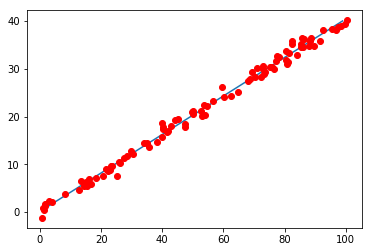

M after compute is:[0.40309555130866914]compare with ground truth: 0.4
b after compute is:[0.12941885038840711]compare with ground truth: 0.2


In [275]:
#TODO Construct the linear function
def linear(p,m,b):
    h = [m,b]
    p_copy=p[:]

    for i in p_copy:
        i.append(1)
    
    Y_predict = matxMultiply(p_copy,h)
    
    return Y_predict

#TODO Construct points with gaussian noise
import random
import matplotlib.pyplot as plt

points = []
points_with_noise = []

xp=[]
yp=[]

xpn=[]
ypn=[]

for i in range(1,100):
    w=[0.4,0.2]
    
    x = random.randint(1,100)
    nx = random.gauss(0, 1)
    xn = round(x+nx,2)
    xp+=[x]
    xpn+=[xn]
    
    y = round(x*w[0]+w[1],2)
    ny = random.gauss(0, 1)
    yn = round(y+ny,2)
    yp+=[y]
    ypn+=[yn]
    
    points.append([x]+[y])
    points_with_noise.append([xn]+[yn])

#TODO Compute m and b and compare with ground truth
m,b=linearRegression(points_with_noise)

x=[]
for i in range(1,100):
    x.append([i])

y_predict = linear(x,m,b)


plt.plot(gcc(x,0), y_predict)
plt.plot(xpn,ypn,'o',color='red')
plt.show()

print('M after compute is:'+ str(m)+'compare with ground truth: 0.4')
print('b after compute is:'+ str(b)+'compare with ground truth: 0.2')